In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import eval_genlaguerre
import scipy.integrate as spi

In [67]:
COEFFICIENTS = {
    1/3: [-1.00000, 0.51053, -0.02056, 0.31003, -0.49050, 0.20102, -0.00904, -0.00148, 0.00000, 0.00120, 0.00060, -0.00180, 0.00000, 0.00000],
    1/5: [-1.0000, -1.0000, 0.6765, 0.3130, -0.1055, 0.8910, -0.3750, -0.7750, 0.3700, 0.0100, -0.0050, -0.0000, -0.1000, 0.1000]
}

In [68]:
def s_bar(k, nu):
    c_m = COEFFICIENTS[nu]
    m_values = np.arange(1, 2 * len(c_m), 2)
    laguerre_sum = sum(c * eval_genlaguerre(m, 0, k**2) for c, m in zip(c_m, m_values))
    return (1 - nu) * np.exp(-k**2 / 2) + 4 * nu * np.exp(-k**2) * laguerre_sum

def theta_integral(q, k, nu):
    def integrand(theta):
        k_plus_q_mag = np.sqrt(k**2 + q**2 + 2 * k * q * np.cos(theta))
        if np.isnan(k_plus_q_mag) or k_plus_q_mag < 1e-10:
            return 0.0

        term1 = np.sin(0.5 * k * q * np.sin(theta))**2 * s_bar(q, nu) * np.exp(-k**2 / 2)
        term2 = np.sin(0.5 * k * q * np.sin(theta))**2 * np.exp(k * q * np.cos(theta)) * s_bar(k_plus_q_mag, nu)
        return term1 - term2

    result, _ = spi.quad(integrand, 0, 2 * np.pi, epsabs=1e-6, epsrel=1e-6)
    return result

def delta_k(k, nu, upsilon_func):
    if k < 1e-10:
        return 0.0

    prefactor = -2 / (2 * np.pi)**2

    def integrand(q):
        if q < 1e-10:
            return 0.0
        return q * upsilon_func(q) * theta_integral(q, k, nu)

    integral, _ = spi.quad(integrand, 1e-6, 20, epsabs=1e-6, epsrel=1e-6)
    s_bar_k = s_bar(k, nu)

    if abs(s_bar_k) < 1e-10:
        return 0.0

    return prefactor * integral / s_bar_k

def plot_delta_k(nu_values, k_vals, upsilon_func):
    plt.figure(figsize=(8, 6))
    colors = ['dodgerblue', 'darkmagenta']

    for idx, nu in enumerate(nu_values):
        print(f'Computing for nu = {nu:.2f}')
        delta_vals = [delta_k(k, nu, upsilon_func) for k in k_vals]

        plt.plot(k_vals, delta_vals, color=colors[idx], linewidth=2)
    plt.xlabel("$k \ell$", fontsize=14)
    plt.ylabel("$ \Delta(k) / (e^2/\epsilon \ell)$", fontsize=14)
    plt.savefig("plot.png")
    plt.show()

In [55]:
# lowest Landau level
def upsilon0(q):
    return 2 * np.pi / q if q > 0 else 0

k_values = np.linspace(0.05, 2, 40)
plot_delta_k(nu_values=[1/3,1/5], k_vals=k_values, upsilon_func=upsilon0)

Computing for nu = 0.33
Computing for nu = 0.20


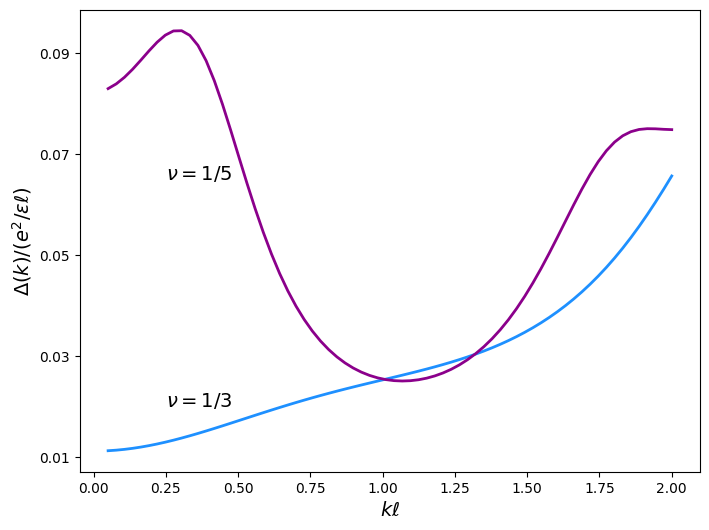

In [65]:
# first Landau level
def upsilon1(q):
    return 2 * np.pi / q * (1-q**2/2)**2 if q > 0 else 0

k_values = np.linspace(0.05, 2, 40)
plot_delta_k(nu_values=[1/3, 1/5], k_vals=k_values, upsilon_func=upsilon1)